In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [87]:
data = pd.read_csv('./gurgaon_properties_cleaned_v2.csv')
data.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
0,house,independent,laxman vihar,1.25,78125.0,160.0,Built Up area: 160 (14.86 sq.m.),2.0,3.0,0,...,NaN,160.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,house,ardee city,sector 52,2.25,16071.0,1400.0,Plot area 2160(200.67 sq.m.)Built Up area: 180...,3.0,3.0,3,...,NaN,1800.0,1400.0,0.0,0.0,1.0,0.0,0.0,2,22
2,flat,signature global city,sector 37d,1.25,6082.0,2055.0,Carpet area: 2055 (190.92 sq.m.),3.0,3.0,3,...,NaN,NaN,2055.0,0.0,0.0,0.0,0.0,0.0,1,16
3,house,ansal api spanish court,palam vihar,2.90,18626.0,1557.0,Plot area 173(144.65 sq.m.)Built Up area: 1415...,4.0,4.0,3,...,NaN,1415.0,1350.0,0.0,1.0,0.0,0.0,0.0,2,49
4,flat,smart world gems,sector 89,0.86,7796.0,1103.0,Carpet area: 1103 (102.47 sq.m.),2.0,3.0,2,...,NaN,NaN,1103.0,1.0,0.0,1.0,1.0,0.0,2,72


In [88]:
data.shape

(3974, 23)

In [114]:
data.duplicated().sum()

140

- there are 140 duplicate values, so drop them

In [117]:
# dropping duplicates

data = data.drop_duplicates()

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3974 non-null   object 
 1   society              3973 non-null   object 
 2   sector               3974 non-null   object 
 3   price                3954 non-null   float64
 4   price_per_sqft       3954 non-null   float64
 5   area                 3954 non-null   float64
 6   areaWithType         3974 non-null   object 
 7   bedRoom              3974 non-null   float64
 8   bathroom             3974 non-null   float64
 9   balcony              3974 non-null   object 
 10  floorNum             3952 non-null   float64
 11  facing               2796 non-null   object 
 12  agePossession        3974 non-null   object 
 13  super_built_up_area  1934 non-null   float64
 14  built_up_area        1861 non-null   float64
 15  carpet_area          2003 non-null   f

# Property type

In [90]:
data['property_type'].isnull().sum()

0

In [91]:
data['property_type'].value_counts()/len(data)

flat     0.754152
house    0.245848
Name: property_type, dtype: float64

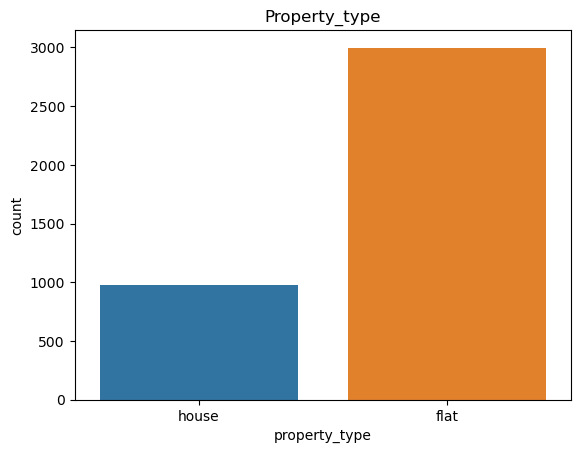

In [92]:
sns.countplot(data['property_type'])
plt.title('Property_type');

- no null values
- around 75% properties are flats and 25% are houses

# Society

In [93]:
data['society'].value_counts()

independent                             574
tulip violet                             75
ss the leaf                              74
shapoorji pallonji joyville gurugram     45
dlf new town heights                     44
                                       ... 
krishna apartment                         1
kashish manor one                         1
raheja teachers apartments                1
shree vardhman mantra                     1
dlf alameda                               1
Name: society, Length: 724, dtype: int64

In [94]:
society_val_counts = data['society'].value_counts()[data['society'].value_counts().index != 'independent']

In [95]:
data[data['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(80)

tulip violet                            0.022065
ss the leaf                             0.043836
shapoorji pallonji joyville gurugram    0.057076
dlf new town heights                    0.070021
signature global park                   0.080906
                                          ...   
puri emerald bay                        0.495146
ireo the corridors                      0.498970
raheja vedaanta                         0.502207
sbtl caladium                           0.505443
breez global heights                    0.508679
Name: society, Length: 80, dtype: float64

In [96]:
society_counts = data['society'].value_counts()

frequency_bins = {
    'very high (>100)' : society_counts[(society_counts > 100)].count(),
    'high (50-100)' : society_counts[(society_counts >= 50) & (society_counts <= 100)].count(),
    'average (10-49)' : society_counts[(society_counts >= 10) & (society_counts <= 49)].count(),
    'low (2-9)' : society_counts[(society_counts >= 2) & (society_counts <= 9)].count(), 
    'very low (1)' :  society_counts[(society_counts == 1)].count()
} 

frequency_bins

{'very high (>100)': 1,
 'high (50-100)': 2,
 'average (10-49)': 98,
 'low (2-9)': 299,
 'very low (1)': 324}

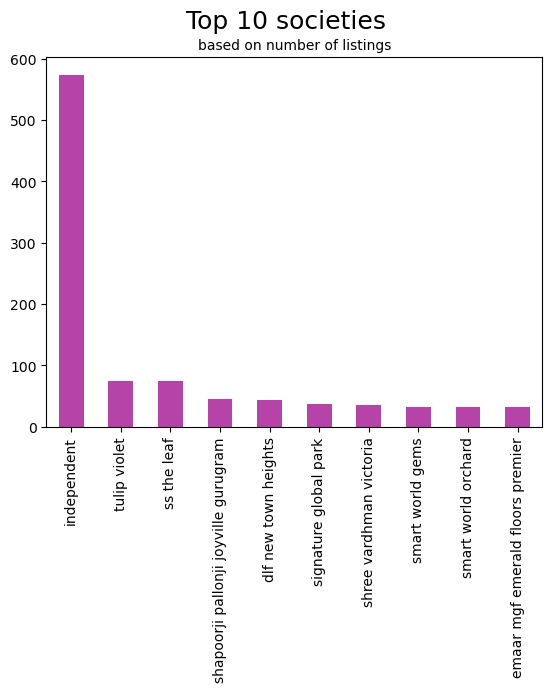

In [110]:
# top 10 societies
data['society'].value_counts().head(10).plot(kind='bar', color='#b643a7')
plt.suptitle('Top 10 societies', fontsize=18)
plt.title('based on number of listings', fontsize=10)
plt.show()

In [98]:
data['society'].isnull().sum()

1

In [99]:
data[data['society'].isnull()].values

array([['flat', nan, ' sector 78 ', 0.6, 3692.0, 1625.0,
        'Built Up area: 1625 (150.97 sq.m.)', 2.0, 2.0, '0', nan, nan,
        'Under construction', nan, 1625.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0,
        0, 0]], dtype=object)

- 724 unique values
- around 14% properties are independent
- there are 723 societies
- around 50% of the flat listings belong to 80 societies out of all the 723 socities in the data

- Frequency bins analysis: 
    * there is one society where there are more than 100 listings
    * there are 2 societies where there are 50-100 listings
    * there are 98 societies where there are 10-49 listings each
    * there are 299 societies where there are 2-9 listings each
    * there are 324 societies where there is only 1 listing each
    
- there is 1 missing value
    * upon examining the row with null value for society, we get to know that around 12 columns  have nan or 0 as values, so we might consider dropping this entire row

# Sector

In [100]:
data['sector'] = data['sector'].str.strip()

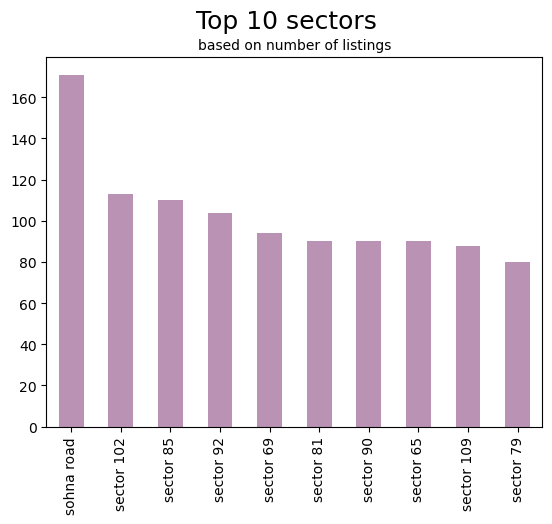

In [107]:
data['sector'].value_counts().head(10).plot(kind='bar', color='#b992b4')
plt.suptitle('Top 10 sectors', fontsize=18)
plt.title('based on number of listings', fontsize=10)
plt.show()

In [120]:
data['sector'].isnull().sum()

0

In [135]:
sector_counts

sohna road                    162
sector 85                     108
sector 102                    107
sector 92                      99
sector 69                      93
                             ... 
ravi nager basai road           1
ats marigold                    1
jacobpura near sadar bazar      1
sispal vihar                    1
khandsa                         1
Name: sector, Length: 287, dtype: int64

79

In [146]:
# binning

sector_counts = data['sector'].value_counts()

frequency_distribution = {
    'very high (>100)' : (sector_counts >= 100).sum(),
    'high (50-100)' : ((sector_counts >= 50) & (sector_counts <=99)).sum(),
    'average (10-49)': ((sector_counts >= 10) & (sector_counts <=49)).sum() ,
    'low (2-9)' : ((sector_counts >= 2) & (sector_counts <= 9)).sum() ,
    'very low (1)' : (sector_counts == 1).sum()
}

frequency_distribution

{'very high (>100)': 3,
 'high (50-100)': 22,
 'average (10-49)': 60,
 'low (2-9)': 123,
 'very low (1)': 79}

In [145]:
data['sector'].value_counts(normalize=True).cumsum().head(26)

sohna road    0.042254
sector 85     0.070423
sector 102    0.098331
sector 92     0.124152
sector 69     0.148409
sector 90     0.171362
sector 81     0.194053
sector 65     0.216745
sector 109    0.239176
sector 79     0.258998
sector 33     0.276995
sector 83     0.294731
sector 50     0.311685
sector 86     0.328378
sector 104    0.344810
sector 37d    0.361242
sector 107    0.376891
sector 108    0.392280
sector 56     0.406886
sector 48     0.421231
sector 95     0.435316
sector 70a    0.449400
sector 37c    0.462963
sector 70     0.476004
sector 67     0.489045
sector 84     0.501826
Name: sector, dtype: float64

- 287 values
- no null values

- analysis of frequency distribution of sectors
    * Very high (>100) -  3 sectors have more than 100 listings
    * High (50-99) - 22 sectors have  50-99 listings each 
    * Average ( 10-49) - 60 sectors have 10-49 listings each
    * Low(2-9) -  123 sectors have  2-9 listings each
    * Very Low (1) : 9 sectors have is 1 listing each

# Price

In [149]:
data['price'].isnull().sum()

19

In [152]:
data['price'].describe()

count    3815.000000
mean        2.501628
std         2.951797
min         0.070000
25%         0.920000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

In [155]:
# calculating IQR
2.7 - 0.92

1.7800000000000002

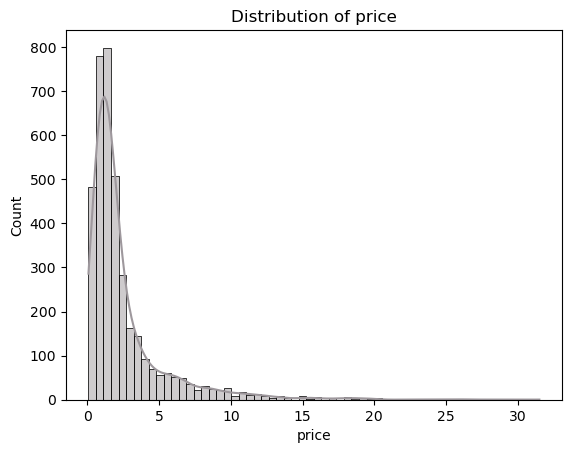

In [162]:
sns.histplot(data['price'], kde=True, bins=60, color='#9e989d')
plt.title('Distribution of price')
plt.show();

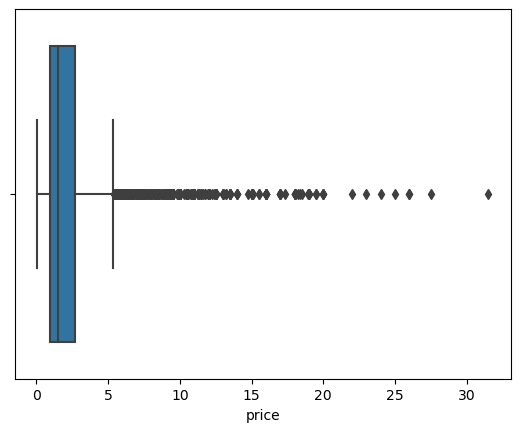

In [151]:
sns.boxplot(data['price']);

- 19 null values

- <b>Descriptive Statistics</b>
    * Count: there are 3815 non-null values
    * Mean price: Rs. 2.5 Cr
    * Median price: Rs. 1.5 Cr
    * Standard deviation: standard deviation is 2.95 which indicates high variability in the data
    * Range : the price ranges from 0.07 Cr to 31.5 Cr
    * IQR : 1.78 Cr
    
- <b>Visualizations</b>
    * Histogram: Price is right-skewed. Most of the properties are priced below 5 crores.  There are a few properties that are priced above 15 crores.
    * Boxplot: Properties whose price is above around Rs.5 can be considered as outliers.

In [168]:
print(f"Skewness : {data['price'].skew()}")
print(f"Kurtosis : {data['price'].kurt()}")

Skewness : 3.2992442138197307
Kurtosis : 15.164019357170382


- <b>Skewness</b>: positively skewed with a value of 3.29
- <b>Kurtosis</b> : approximately 35.16. A kurtosis value of greater than 3 indicates heavier tails and more outliers as compared to a normal distribution.

In [169]:
data['price'].quantile([.01, .05, .95, .99])

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.086
Name: price, dtype: float64

- <b>Quantile analysis</b>
    * 1st Quantile : 1% properties are priced below Rs. 0.25 cr
    * 5th Quantile : 5% properties are priced below Rs. 0.37 crore
    * 95th Quantile : 95% properties are priced below Rs. 8.49 crore
    * 99th Quantile : 99% properties are priced below Rs. 15.086 crore

In [175]:
# IQR

Q1 = data['price'].describe()['25%']
Q3 = data['price'].describe()['75%']
IQR = Q3-Q1

In [182]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound, upper_bound)

-1.7500000000000004 5.370000000000001


In [193]:
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
outliers.shape

(439, 23)

In [195]:
outliers['price'].describe()

count    439.000000
mean       9.164556
std        4.049009
min        5.400000
25%        6.350000
50%        8.000000
75%       10.550000
max       31.500000
Name: price, dtype: float64

- Outlier analysis
    * Based on IQR analysis, 439 properties can be considered as outliers
    * The average price of outlier properties is approximately Rs. 9.16 crores
    * The price range of outlier properties is between Rs. 5.4 Cr and Rs. 31.5 crore

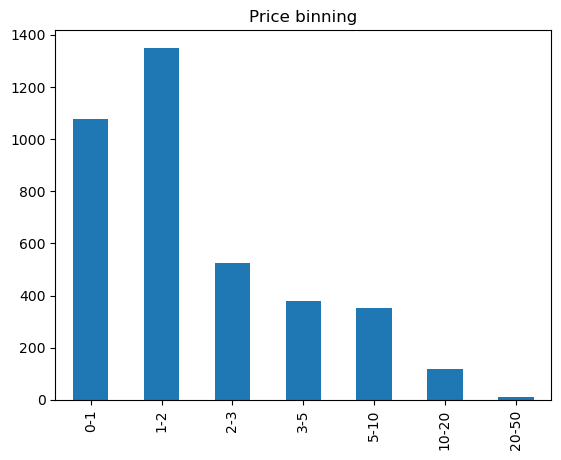

In [198]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50' ]
pd.cut(data['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')
plt.title('Price binning')
plt.show();

- Majority of the properties lie in the price ranges of 0-1 and 1-2 crores
- Beyond Rs.2 crores, as the price range increases, number of properties decreases.

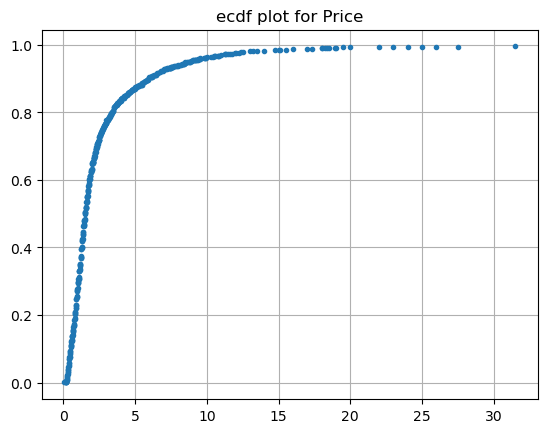

In [204]:
# ecdf plot
ecdf = data['price'].value_counts().sort_index().cumsum() / len(data)
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.title('ecdf plot for Price')
plt.grid()
plt.show()

- around 85% properties are priced below Rs. 5 crores

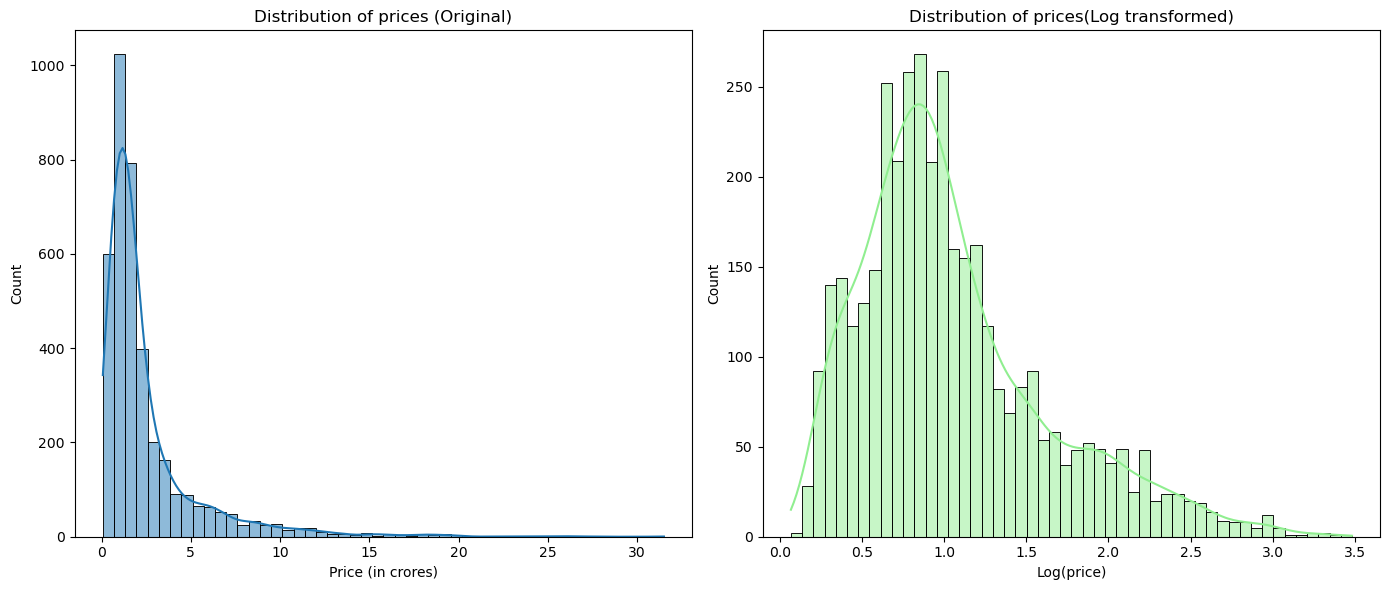

In [225]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.histplot(data['price'], bins=50, kde=True, ax=ax1)
ax1.set_title('Distribution of prices (Original)')
ax1.set_xlabel('Price (in crores)')

sns.histplot(np.log1p(data['price']), bins=50, kde=True, color='lightgreen', ax=ax2)
ax2.set_title('Distribution of prices(Log transformed)')
ax2.set_xlabel('Log(price)')

plt.tight_layout()
plt.show()

- Why have I used log1p for log transformation and not just log?<Br>
Because if I apply log transformation , then the range of values extends to negative values as well but prices cannot be negative. so, I've used log1p.

In [ ]:
# box plot of price and log1p(price)

# price_per_sqft

In [226]:
data['price_per_sqft'].isnull().sum()

19

In [231]:
data['price_per_sqft'].describe()

count      3815.00000
mean      14009.11481
std       23338.60708
min           2.00000
25%        6804.00000
50%        9011.00000
75%       13872.50000
max      600000.00000
Name: price_per_sqft, dtype: float64

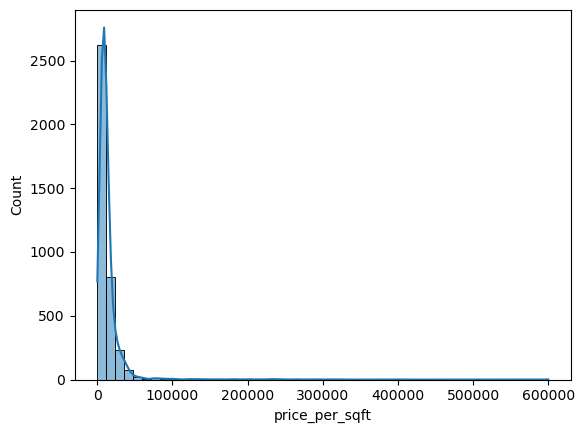

In [230]:
sns.histplot(data['price_per_sqft'], bins=50, kde=True);

- the data is right-skewed
- majority of the properties have a price per sqft below Rs. 50000

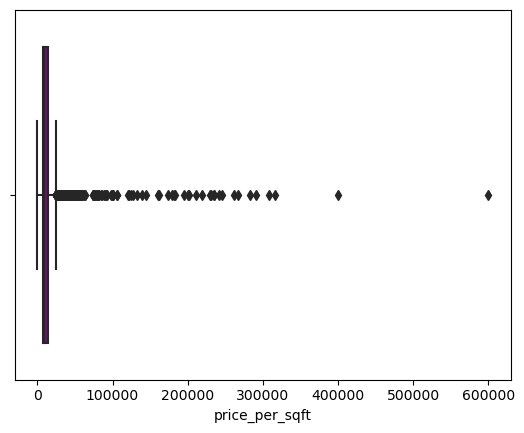

In [235]:
sns.boxplot(data['price_per_sqft'], color='purple');

- IQR is very compact
- there are many outliers on the higher price range

- 19 null values
- potential outliers
- right skewed

# bedroom

In [239]:
data['bedRoom'].isnull().sum()

0

In [242]:
data['bedRoom'] = data['bedRoom'].astype('int')

In [243]:
data['bedRoom'].describe()

count    3834.000000
mean        3.385498
std         2.031466
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bedRoom, dtype: float64

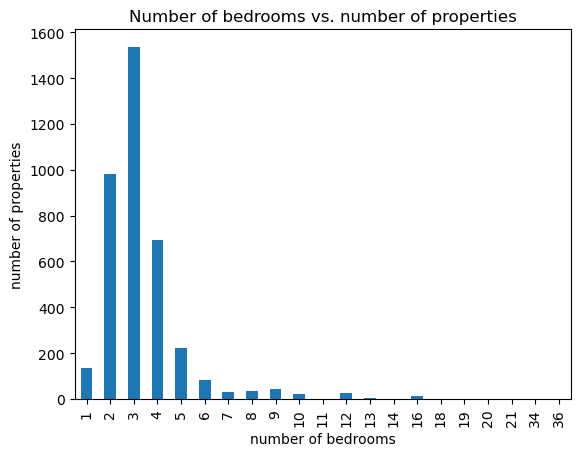

In [249]:
data['bedRoom'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of bedrooms vs. number of properties')
plt.xlabel('number of bedrooms')
plt.ylabel('number of properties')
plt.show()

- majority of the properties have less than 6 bedrooms.

- 0 null values